In [2]:
import numpy as np
from sklearn.utils import resample
import matplotlib.pyplot as plt

# Function to perform bootstrap sampling
def bootstrap_mean(model_1_results, n_iterations=10000):
    n_size = len(model_1_results)
    diff_means = []

    for i in range(n_iterations):
        # Generate bootstrap sample
        sample_1 = resample(model_1_results, n_samples=n_size, random_state=i)
        
        # Calculate the difference in means
        diff_mean = np.mean(sample_1)
        diff_means.append(diff_mean)
    
    return diff_means

# Results

| Model                    | Seed | Blimp | Glue |
|--------------------------|------|-------|------|
| BERT Baseline (GELU)     | 42   | 54.94 | 49.22 |
| BERT Baseline (GELU)     | 2    | 59.5  | 59.9  |
| BERT Baseline (GELU)     | 3    | 59.6  | 56.6  |
| BERT Baseline (GELU)     | 4    | 59.3  | 57.0  |
| BERT Baseline (GELU)     | 5    | 59.1  | 57.5  |
| GPT Baseline (GELU)      | 42   | 59.05 | 58.22 |
| GPT Baseline (GELU)      | 1    | 58.0  | 58.5  |
| GPT Baseline (GELU)      | 2    | 56.6  | 57.8  |
| GPT Baseline (GELU)      | 3    | 56.6  | 59.1  |
| GPT Baseline (GELU)      | 4    | 59.2  | 60.5  |
| GPT Baseline (GELU)      | 5    | 57.4  | 59.6  |
| BERT Learnable GELU      | 42   | 59.4  | 57.1  |
| BERT Learnable GELU      | 1    | 59.8  | 56.2  |
| BERT Learnable GELU      | 2    | 59.3  | 59.7  |
| BERT Learnable GELU      | 3    | 59.0  | 57.0  |
| BERT Learnable GELU      | 4    | 58.2  | 57.0  |
| BERT Learnable GELU      | 5    | 59.8  | 59.2  |
| GPT Learnable GELU       | 42   | 56.8  | 60.2  |
| GPT Learnable GELU       | 1    | 56.3  | 58.8  |
| GPT Learnable GELU       | 2    | 57.4  | 58.7  |
| GPT Learnable GELU       | 3    | 58.7  | 59.6  |
| GPT Learnable GELU       | 4    | 56.0  | 59.2  |
| GPT Learnable GELU       | 5    | 58.3  | 59.3  |
| BERT ReLU                | 42   | 58.5  | 57.2  |
| BERT ReLU                | 1    | 58.0  | 58.7  |
| BERT ReLU                | 2    | 56.1  | 59.6  |
| BERT ReLU                | 3    | 59.2  | 56.3  |
| BERT ReLU                | 4    | 58.7  | 58.8  |
| BERT ReLU                | 5    | 59.9  | 56.8  |
| GPT ReLU                 | 42   | 56.6  | 59.9  |
| GPT ReLU                 | 1    | 58.5  | 58.7  |
| GPT ReLU                 | 2    | 56.1  | 59.6  |
| GPT ReLU                 | 3    | 57.4  | 59.3  |
| GPT ReLU                 | 4    | 55.0  | 58.9  |
| GPT ReLU                 | 5    | 57.9  | 60.1  |
| BERT SiLU                | 42   | 58.3  | 57.5  |
| BERT SiLU                | 1    | 58.9  | 58.9  |
| BERT SiLU                | 2    | 59.8  | 57.4  |
| BERT SiLU                | 3    | 59.6  | 57.1  |
| BERT SiLU                | 4    | 59.0  | 57.3  |
| BERT SiLU                | 5    | 59.4  | 57.0  |
| GPT SiLU                 | 42   | 56.3  | 59.9  |
| GPT SiLU                 | 1    | 59.3  | 57.7  |
| GPT SiLU                 | 2    | 55.9  | 58.5  |
| GPT SiLU                 | 3    | 57.9  | 59.7  |
| GPT SiLU                 | 4    | 57.2  | 58.9  |
| GPT SiLU                 | 5    | 56.9  | 59.6  |
| BERT Swish               | 42   | 58.0  | 57.8  |
| GPT Swish                | 42   | 53.7  | 57.6  |
| BERT PReLU               | 42   | 57.0  | 57.6  |
| GPT PReLU                | 42   | 59.2  | 56.1  |
| BERT KAN                 | 42   | 56.69 | 63.65 |
| GPT KAN                  | 42   | 63.43 | 48.8  |


### Blimp benchmark bootstrap statistical analysis

In [3]:
import pandas as pd
blimp_scores = {
    "BERT Baseline (GELU)": [54.94, 59.5, 59.6, 59.3, 59.1],
    "GPT Baseline (GELU)": [59.05, 58.0, 56.6, 56.6, 59.2, 57.4],
    "BERT Learnable GELU": [59.4, 59.8, 59.3, 59.0, 58.2, 59.8],
    "GPT Learnable GELU": [56.8, 56.3, 57.4, 58.7, 56.0, 58.3],
    "BERT ReLU": [58.5, 58.0, 56.1, 59.2, 58.7, 59.9],
    "GPT ReLU": [56.6, 58.5, 56.1, 57.4, 55.0, 57.9],
    "BERT SiLU": [58.3, 58.9, 59.8, 59.6, 59.0, 59.4],
    "GPT SiLU": [56.3, 59.3, 55.9, 57.9, 57.2, 56.9],
    "BERT Swish": [58, 57.7, 57.2, 58.9, 59, 58.8],
    "GPT Swish": [53.7, 55, 56, 56.4, 57.2, 55.6],
    "GPT KAN": [63.43, 52.7, 53.8, 54.9, 54.2, 53.2],
    "BERT PReLU": [57, 59.8, 58.2, 58.7, 58, 58.5],
    "GPT PReLU": [59.2, 56.2, 55.5, 56.6, 59.6, 58.5]
}

# Perform bootstrap sampling for each model group and calculate mean and confidence intervals
blimp_combined_results = []

for model, scores in blimp_scores.items():
    baseline_results = np.array(scores)
    bootstrap_means = bootstrap_mean(baseline_results, n_iterations=10000)
    conf_interval = np.percentile(bootstrap_means, [2.5, 97.5])
    mean_bootstrap = np.mean(bootstrap_means)
    blimp_combined_results.append((model, mean_bootstrap, conf_interval))

# Convert results to DataFrame
df_combined_results = pd.DataFrame(blimp_combined_results, columns=["Model", "Blimp", "95% CI"])

df_combined_results

,Model,Blimp,95% CI
0,BERT Baseline (GELU),58.484510,"[56.684000000000005, 59.5]"
1,GPT Baseline (GELU),57.816387,"[56.96666666666667, 58.675000000000004]"
2,BERT Learnable GELU,59.249337,"[58.78333333333333, 59.65]"
3,GPT Learnable GELU,57.241010,"[56.46666666666667, 58.03333333333333]"
4,BERT ReLU,58.396850,"[57.366666666666674, 59.23333333333333]"
5,GPT ReLU,56.913840,"[55.93333333333334, 57.80041666666666]"
6,BERT SiLU,59.163088,"[58.75, 59.53375]"
7,GPT SiLU,57.251572,"[56.43333333333334, 58.199999999999996]"
8,BERT Swish,58.264617,"[57.716249999999995, 58.75]"
9,GPT Swish,55.646495,"[54.68333333333334, 56.46666666666667]"


In [4]:
glue_scores = {
    "BERT Baseline (GELU)": [56.2, 59.9, 56.6, 57.0, 57.5],
    "GPT Baseline (GELU)": [58.22, 58.5, 57.8, 59.1, 60.5, 59.6],
    "BERT Learnable GELU": [57.1, 56.2, 59.7, 57.0, 57.0, 59.2],
    "GPT Learnable GELU": [60.2, 58.8, 58.7, 59.6, 59.2, 59.3],
    "BERT ReLU": [57.2, 58.7, 59.6, 56.3, 58.8, 56.8],
    "GPT ReLU": [59.9, 58.7, 59.6, 59.3, 58.9, 60.1],
    "BERT SiLU": [57.5, 58.9, 57.4, 57.1, 57.3, 57.0],
    "GPT SiLU": [59.9, 57.7, 58.5, 59.7, 58.9, 59.6],
    "BERT Swish": [57.8, 57.3, 58.9, 56.8, 58.8, 57.7],
    "GPT Swish": [57.6, 58.6, 59.2, 57.9, 57.8, 59, 58.5],
    "GPT KAN": [48.8, 56.5, 56.6, 57, 55.4, 56.7],
    "BERT PReLU": [57.6, 59.6, 58.1, 56.9, 59.5, 59.8],
    "GPT PReLU": [56.1, 59.1, 60.5, 59.5, 58.2, 59.6]
}
# Perform bootstrap sampling for each model group and calculate mean and confidence intervals
glue_combined_results = []

for model, scores in glue_scores.items():
    baseline_results = np.array(scores)
    bootstrap_means = bootstrap_mean(baseline_results, n_iterations=10000)
    conf_interval = np.percentile(bootstrap_means, [2.5, 97.5])
    mean_bootstrap = np.mean(bootstrap_means)
    glue_combined_results.append((model, mean_bootstrap, conf_interval))

# Convert results to DataFrame
glue_df_combined_results = pd.DataFrame(glue_combined_results, columns=["Model", "Glue", "95% CI"])

glue_df_combined_results

,Model,Glue,95% CI
0,BERT Baseline (GELU),57.444388,"[56.52, 58.739999999999995]"
1,GPT Baseline (GELU),58.952930,"[58.27333333333334, 59.70000000000001]"
2,BERT Learnable GELU,57.694065,"[56.75, 58.73333333333333]"
3,GPT Learnable GELU,59.299937,"[58.916666666666664, 59.73333333333333]"
4,BERT ReLU,57.906140,"[56.98333333333333, 58.86666666666667]"
5,GPT ReLU,59.414600,"[59.0, 59.81666666666667]"
6,BERT SiLU,57.537063,"[57.150000000000006, 58.1]"
7,GPT SiLU,59.046733,"[58.4, 59.633333333333326]"
8,BERT Swish,57.885857,"[57.28333333333334, 58.48333333333334]"
9,GPT Swish,58.368853,"[57.957142857142856, 58.785714285714285]"


### GPT Confidence interval plots

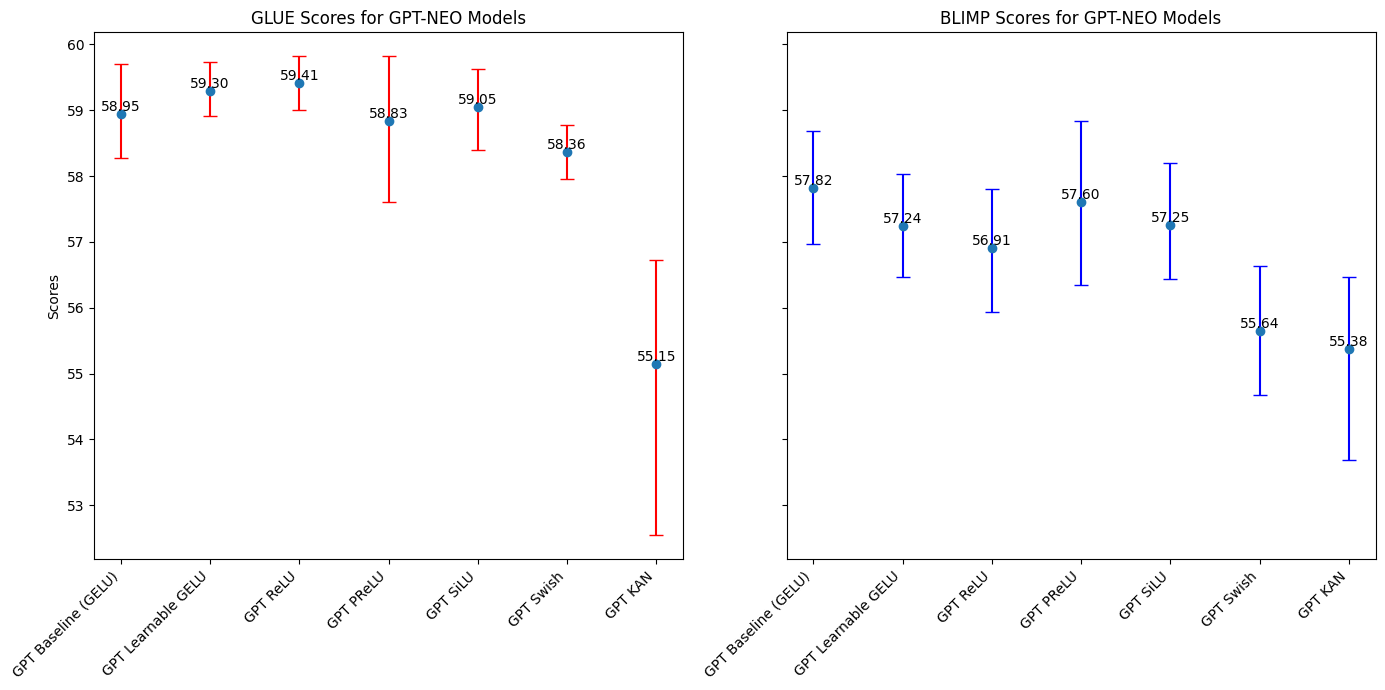

In [3]:
import matplotlib.pyplot as plt

# Data provided
models = ["GPT Baseline (GELU)", "GPT Learnable GELU", "GPT ReLU", "GPT PReLU", "GPT SiLU", "GPT Swish", "GPT KAN"]
glue_means = [58.95, 59.3, 59.41, 58.83, 59.05, 58.36, 55.15]
glue_ci_lower = [58.27, 58.92, 59.0, 57.6, 58.4, 57.95, 52.54]
glue_ci_upper = [59.7, 59.73, 59.82, 59.82, 59.63, 58.78, 56.73]

blimp_means = [57.82, 57.24, 56.91, 57.6, 57.25, 55.64, 55.38]
blimp_ci_lower = [56.97, 56.47, 55.93, 56.34, 56.43, 54.68, 53.68]
blimp_ci_upper = [58.68, 58.03, 57.8, 58.83, 58.2, 56.64, 56.47]

import numpy as np

# Define the error values for GLUE and BLIMP
glue_errors = np.array([(glue_means[i] - glue_ci_lower[i], glue_ci_upper[i] - glue_means[i]) for i in range(len(glue_means))]).T
blimp_errors = np.array([(blimp_means[i] - blimp_ci_lower[i], blimp_ci_upper[i] - blimp_means[i]) for i in range(len(blimp_means))]).T

# Plotting the data
fig, ax = plt.subplots(1, 2, figsize=(14, 7), sharey=True)

# GLUE Scores
ax[0].errorbar(models, glue_means, yerr=glue_errors, fmt='o', capsize=5, ecolor='r', label='GLUE')
ax[0].set_title('GLUE Scores for GPT-NEO Models')
ax[0].set_ylabel('Scores')
ax[0].set_xticks(range(len(models)))
ax[0].set_xticklabels(models, rotation=45, ha='right')

for i, mean in enumerate(glue_means):
    ax[0].text(i, mean, f'{mean:.2f}', ha='center', va='bottom')

# BLIMP Scores
ax[1].errorbar(models, blimp_means, yerr=blimp_errors, fmt='o', capsize=5, ecolor='b', label='BLIMP')
ax[1].set_title('BLIMP Scores for GPT-NEO Models')
ax[1].set_xticks(range(len(models)))
ax[1].set_xticklabels(models, rotation=45, ha='right')

for i, mean in enumerate(blimp_means):
    ax[1].text(i, mean, f'{mean:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### BERT Confidence interval plots

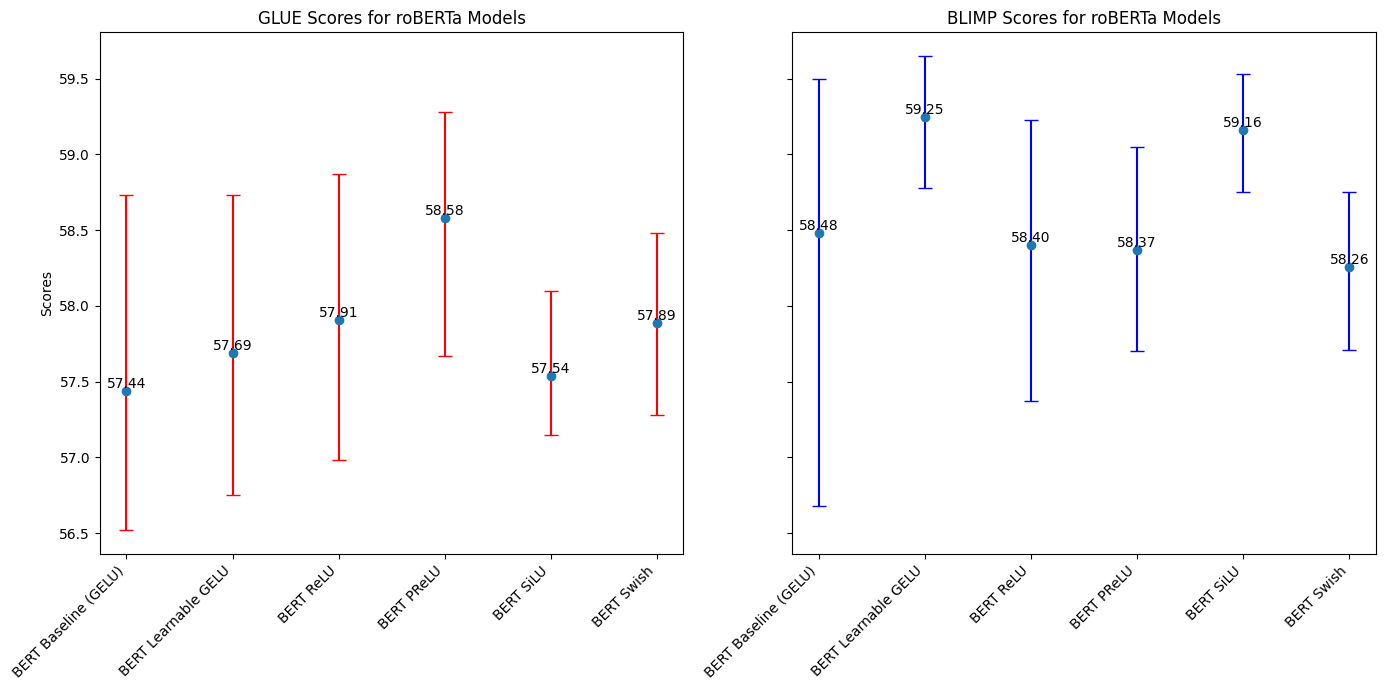

In [4]:
# Data provided for BERT models
bert_models = [
    "BERT Baseline (GELU)", "BERT Learnable GELU", "BERT ReLU", 
    "BERT PReLU", "BERT SiLU", "BERT Swish"
]

bert_glue_means = [57.44, 57.69, 57.91, 58.58, 57.54, 57.89]
bert_glue_ci_lower = [56.52, 56.75, 56.98, 57.67, 57.15, 57.28]
bert_glue_ci_upper = [58.73, 58.73, 58.87, 59.28, 58.1, 58.48]

bert_blimp_means = [58.48, 59.25, 58.4, 58.37, 59.16, 58.26]
bert_blimp_ci_lower = [56.68, 58.78, 57.37, 57.7, 58.75, 57.71]
bert_blimp_ci_upper = [59.5, 59.65, 59.23, 59.05, 59.53, 58.75]

# Define the error values for GLUE and BLIMP for BERT models
bert_glue_errors = np.array([(bert_glue_means[i] - bert_glue_ci_lower[i], bert_glue_ci_upper[i] - bert_glue_means[i]) for i in range(len(bert_glue_means))]).T
bert_blimp_errors = np.array([(bert_blimp_means[i] - bert_blimp_ci_lower[i], bert_blimp_ci_upper[i] - bert_blimp_means[i]) for i in range(len(bert_blimp_means))]).T

# Plotting the data for BERT models
fig, ax = plt.subplots(1, 2, figsize=(14, 7), sharey=True)

# GLUE Scores for BERT models
ax[0].errorbar(bert_models, bert_glue_means, yerr=bert_glue_errors, fmt='o', capsize=5, ecolor='r', label='GLUE')
ax[0].set_title('GLUE Scores for roBERTa Models')
ax[0].set_ylabel('Scores')
ax[0].set_xticks(range(len(bert_models)))
ax[0].set_xticklabels(bert_models, rotation=45, ha='right')

for i, mean in enumerate(bert_glue_means):
    ax[0].text(i, mean, f'{mean:.2f}', ha='center', va='bottom')

# BLIMP Scores for BERT models
ax[1].errorbar(bert_models, bert_blimp_means, yerr=bert_blimp_errors, fmt='o', capsize=5, ecolor='b', label='BLIMP')
ax[1].set_title('BLIMP Scores for roBERTa Models')
ax[1].set_xticks(range(len(bert_models)))
ax[1].set_xticklabels(bert_models, rotation=45, ha='right')

for i, mean in enumerate(bert_blimp_means):
    ax[1].text(i, mean, f'{mean:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()